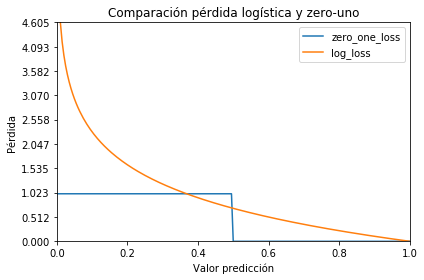

In [2]:
# De https://gist.github.com/dalmia/44e86e200c95c31d6700b919b3ff2463
from sklearn.metrics import log_loss, zero_one_loss
import numpy as np

import matplotlib.pyplot as plt

y_true = np.ones(201, dtype='float')
y_pred = np.linspace(start=0, stop=1.0, num=201) # only the last prediction is correct

# storing the losses for each example
zero_one_losses = []
cross_entropy_losses = []

for i in range(len(y_true)):
    zero_one_loss_value = zero_one_loss([y_true[i]], [y_pred[i] >= 0.5])
    cross_entropy_loss_value = log_loss([y_true[i]], [y_pred[i]], labels=[0, 1])
    zero_one_losses.append(zero_one_loss_value)
    cross_entropy_losses.append(cross_entropy_loss_value)
    
# neat visualization hack
y_max_allowed = 5
for i, loss in enumerate(cross_entropy_losses):
    if loss <= 5:
        index_to_start = i
        break
        
# plotting
plt.plot(y_pred, zero_one_losses, label='zero_one_loss')
plt.plot(y_pred[index_to_start:], cross_entropy_losses[index_to_start:], label='log_loss')
plt.legend(loc='best')
plt.xlabel('Valor predicción')
plt.ylabel('Pérdida')
plt.title('Comparación pérdida logística y zero-uno')
plt.xticks(np.linspace(0, 1.4, 8))
plt.yticks(np.linspace(0, np.max(cross_entropy_losses[index_to_start:]), 10))
plt.tight_layout()
plt.margins(0)
plt.savefig('../../img/loss_comparison.png')
plt.show()